# CNN Cifar10

## Introduction
Image Classification is familiar problem in Computer Vision field. Image classification is the task of assigning an input image one label from a fixed set of categories. This application is applied in a large variety of practical. 


In this practive, we will train a model that has ability to classifi image. The dataset we choose to train is CIFAR10.  
The CIFAR-10 dataset consists of 60,000 photos divided into 10 classes. Keras has the facility to automatically download standard datasets like CIFAR-10 and store them in the ~/.keras/datasets. In this practive, we will familiarize oneself with convolution neural network and somehow can understand how to create a simple Convolutional Neural Network for object recognition.
10 classes in CIFAR10:
-     airplane										
-     automobile										
-     bird										
-     cat										
-     deer										
-     dog										
-     frog										
-     horse										
-     ship										
-     truck

## Import library, preview CIFAR10 dataset

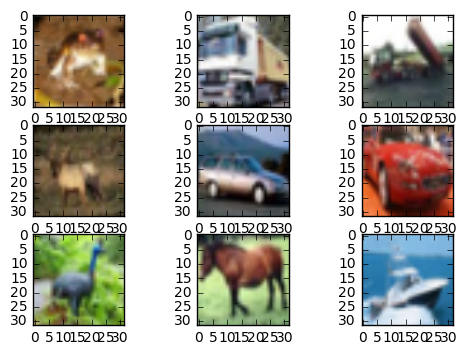

In [3]:
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(X_train[i]))
pyplot.show()

## Import function for our project

In [4]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

## Load dataset

In [30]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)

10


The pixel values are in the range of 0 to 255 for each of the red, green and blue channels

We divide the value by 255 to normalize the data

## Configure model

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 2
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
__________

## Train model

In [9]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 782s - loss: 1.7414 - acc: 0.3730 - val_loss: 1.5246 - val_acc: 0.4689

(3, 32, 32)
[[ 0.00660053  0.00333988  0.248647    0.3509787   0.12069438  0.12400879
   0.09758744  0.04176406  0.0023936   0.00398558]]
3


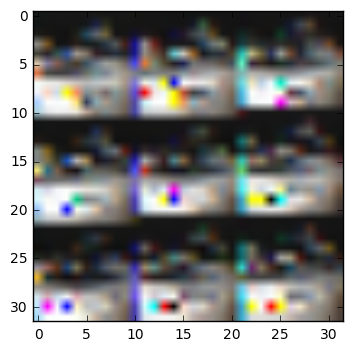

In [32]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt



print(X_test[1].shape)
im = X_test[1]
test_image = np.array(im, dtype=np.uint8)
test_image = test_image.astype('float32')
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
print(result)
print(np.argmax(result))
plt.imshow(im.reshape(32,32,3)*255)
plt.show()